### MOBILE PRICE CLASSIFICATION WITH SUPPORT VECTOR MACHINE ALGORITHM

A mobile phone, cell phone, cellphone, or hand phone, sometimes shortened to simply mobile, cell or just phone, is a portable telephone that can make and receive calls over a radio frequency link while the user is moving within a telephone service area. 

The first handheld mobile phone was demonstrated by John F. Mitchell and Martin Cooper of Motorola in 1973, using a handset weighing c. 2 kilograms (4.4 lbs). 

In 1979, Nippon Telegraph and Telephone (NTT) launched the world's first cellular network in Japan. In 1983, the DynaTAC 8000x was the first commercially available handheld mobile phone. From 1983 to 2014, worldwide mobile phone subscriptions grew to over seven billion—enough to provide one for every person on Earth. 

In first quarter of 2016, the top smartphone developers worldwide were Samsung, Apple, and Huawei, and smartphone sales represented 78 percent of total mobile phone sales. For feature phones (or "dumbphones") as of 2016, the largest were Samsung, Nokia, and Alcatel.

source:https://en.wikipedia.org/wiki/Mobile_phone

Evolution of Mobile Phone
![](https://s3b.cashify.in/blog/wp-content/uploads/2018/05/mobile-phone-evolution.jpg)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.plotly as py
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv']


In this kernel, I analyzed mobile phone features with price range. Also I build a model using support vector machine algortihm.

### CONTENTS:

1. [Read Data](#1)


2. [Data Analysis](#2):
     2. 1.  [Data Visualization](#3) :
            * [PRICE RANGE AND RAM](#4)
            * [BATTERY POWER- RAM AND PRICE RANGE](#5)
            * [INTERNAL MEMORY IN GIGABYTE - RAM AND PRICE RANGE](#6)
            * [TOUCH SCREEN-RAM AND PRICE RANGE](#7)
            * [3G-RAM and Price Range](#8)
            * [4G-RAM and Price Range](#9)
            * [NUMBER OF CORES OF PROCESOR(n_cores)- RAM and PRICE RANGE](#10)
            * [Primary Camera mega pixels(pc) - RAM and Price Range](#11)
            * [Front Camera mega pixels(fc) - RAM and Price Range](#12)
            * [Weight of mobile phone(mobile_wt)- RAM and Price Range](#13)
            * [Mobile Depth in cm (m_dep), Pixel Resolution Height(px_height), Pixel Resolution Width(px_width), Clock Speed(clock_speed) , RAM and Price Range](#14)
            * [Longest time that a single battery charge will last when you are(talk_time),RAM and Price Range](#15)
            * [WIFI-RAM and PRICE RANGE](#16)
            * [DUAL SIM- RAM AND PRICE RANGE](#17)
            * [Screen Height of mobile(sc_h) AND Screen Width of mobile(sc_w)- RAM and Price Range](#18)
            

3. [Support Vector Machine Algorithm](#19):
     * [Class Balance Visualization](#20)
     * [First Model](#21)
     * [Feature Selection](#22)
     * [Model with GridSearchCV](#23)
     * [CV SCORES](#24)
     * [Building Model](#25)
     
4. [Prediction Visualization](#26)

<a id="1"></a> <br>
## 1- READ DATA

In [2]:
data=pd.read_csv("../input/train.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


Dataset as 21 features and 2000 entries. 
The meanings of the features are given below. 

**battery_power: ** Total energy a battery can store in one time measured in mAh

**blue:** Has bluetooth or not

**clock_speed:** speed at which microprocessor executes instructions

**dual_sim:** Has dual sim support or not

**fc:** Front  Camera mega pixels

**four_g:** Has 4G or not

**int_memory:** Internal Memory in Gigabytes

**m_dep:** Mobile Depth in cm

**mobile_wt:** Weight of mobile phone

**n_cores:** Number of cores of processor

**pc:** Primary Camera mega pixels

**px_height:** Pixel Resolution Height

**px_width:** Pixel Resolution Width

**ram:** Random Access Memory in Mega Bytes

**sc_h:** Screen Height of mobile in cm

**sc_w:** Screen Width of mobile in cm

**talk_time:** longest time that a single battery charge will last when you are

**three_g:** Has 3G or not

**touch_screen:** Has touch screen or not

**wifi:** Has wifi or not

**price_range:** This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In the following table, first 10 entries are shown. 

In [4]:
from plotly.tools import FigureFactory as ff
datahead=data.head(10)
datahead=datahead.rename(index=str, columns={"battery_power": "Battery Power", "blue": "Bluetooth","clock_speed":"Clock Speed","dual_sim":"Dual Sim","fc":"Front Camera MP",
                                   "four_g":"4G","int_memory":"Internal Memory(GB)","m_dep":"Mobile Depth(CM)","mobile_wt":"Weight","n_cores":"Number of cores","pc":"Primary Camera MP"
                                   ,"px_height":"Pixel R. Height","px_width":"Pixel R. Width","ram":"RAM(MB)","sc_h":"Screen Height(cm)","sc_w":"Screen Width",
                                   "talk_time":"Longest Battery Charge","three_g":"3G","touch_screen":"Touch Screen","wifi":"WIFI","price_range":"Price Range"})
colorscale = "Greens"
table = ff.create_table(datahead,colorscale=colorscale,height_constant=40)
table.layout.width=2500
for i in range(len(table.layout.annotations)):
    table.layout.annotations[i].font.size = 8
iplot(table)

Now let's check if there are any missing values in the dataset.

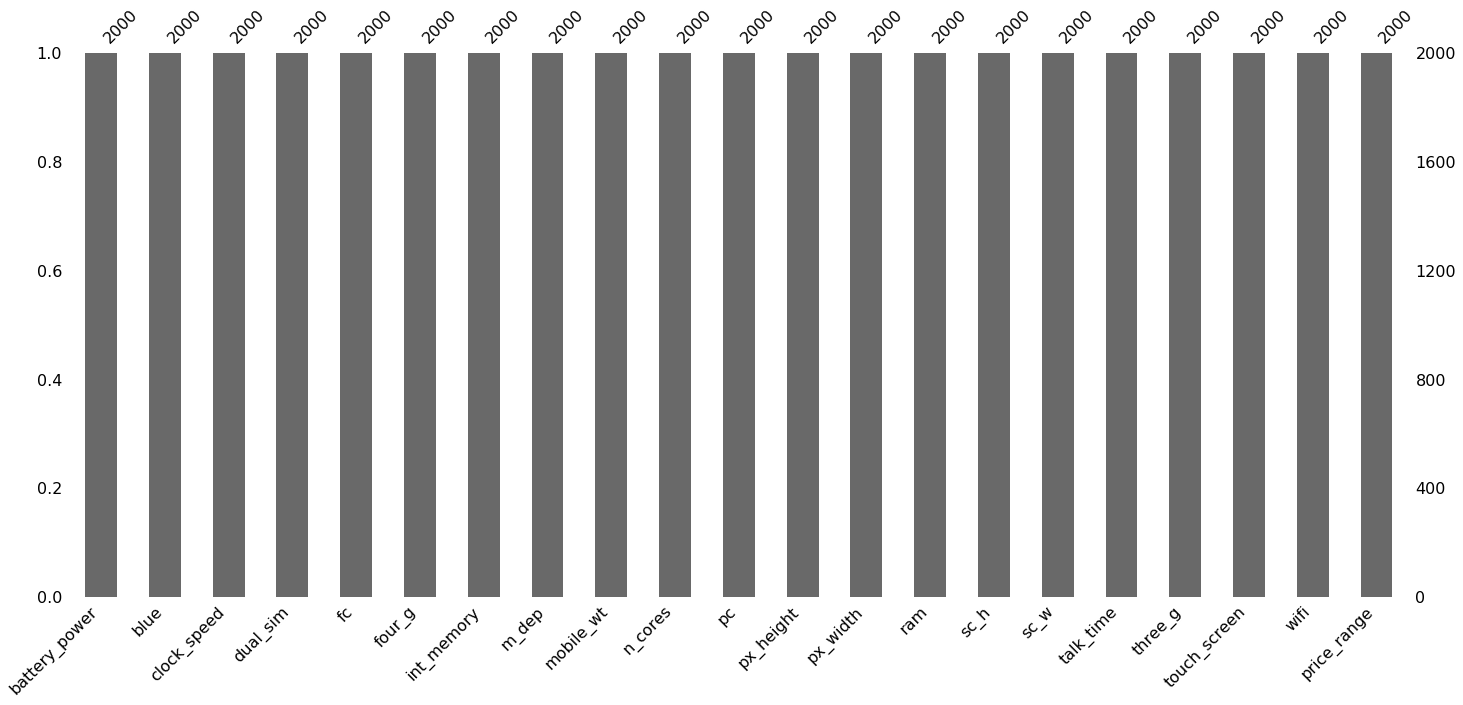

In [5]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(data)
plt.show()

<a id="2"></a> <br>
## 2- DATA ANALYSIS 


#### CORRELATION BETWEEN FEATURES

Following heatmap shows correlation values between features.

Text(0.5, 1.0, 'Correlation ')

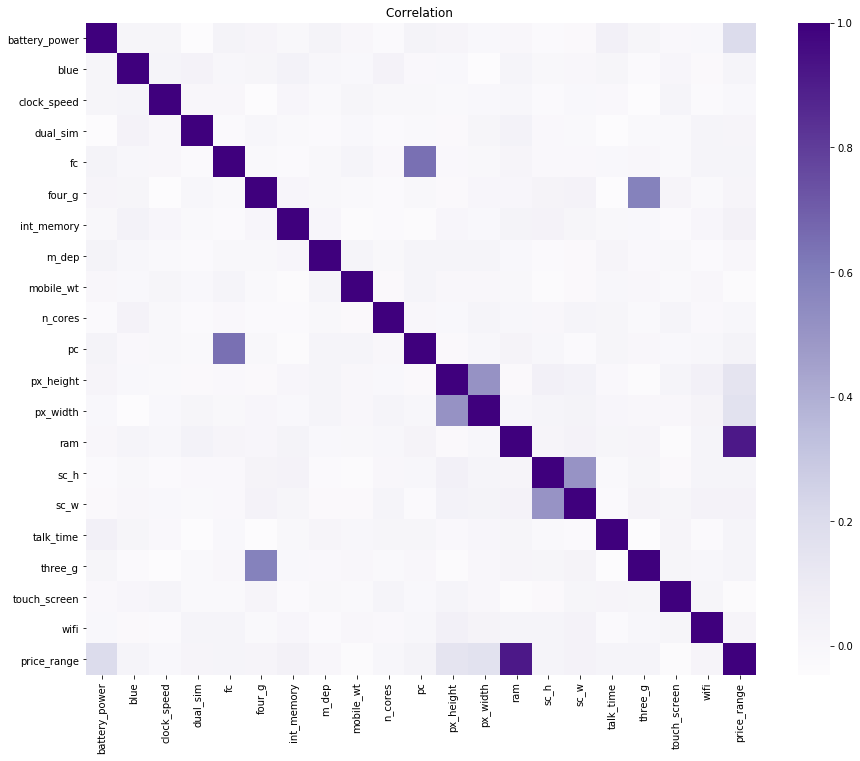

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=data.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Purples')
r.set_title("Correlation ")

As we can see our target price range has highly positive correlation between ram. 

Also 

* 3G and 4G
* pc(Primary Camera mega pixels) and fc(Front Camera mega pixels)
* px_weight(Pixel Resolution Width) and px_height(Pixel Resolution Height)
* sc_w(Screen Width of mobile in cm) and sc_h(Screen Height of mobile in cm)

features have highly positive correlation. For example 	as long as sc_w (screen width of mobile) increase, sc_h(screen height of mobile) is increasing.


Now lets see correlation values price range and other features.

In [7]:
#price range correlation
corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

Price range and RAM have about 0.91 correlation. Because of that I compared ram and other features with price range with Altair, Seaborn and Plotly libraries.

<a id="3"></a> <br>
### RAM AND OTHER FEATURES COMPRASION

In [8]:
import csv
import json
import re
import numpy as np
import pandas as pd
import altair as alt

from collections import Counter, OrderedDict
from IPython.display import HTML
from  altair.vega import v3

# The below is great for working but if you publish it, no charts show up.
# The workaround in the next cell deals with this.
alt.renderers.enable('notebook')

HTML("This code block contains import statements and setup.")

In [9]:
import altair as alt
from  altair.vega import v3
import json
alt.renderers.enable('notebook')
vega_url = 'https://cdn.jsdelivr.net/npm/vega@' + v3.SCHEMA_VERSION
vega_lib_url = 'https://cdn.jsdelivr.net/npm/vega-lib'
vega_lite_url = 'https://cdn.jsdelivr.net/npm/vega-lite@' + alt.SCHEMA_VERSION
vega_embed_url = 'https://cdn.jsdelivr.net/npm/vega-embed@3'
noext = "?noext"

paths = {
    'vega': vega_url + noext,
    'vega-lib': vega_lib_url + noext,
    'vega-lite': vega_lite_url + noext,
    'vega-embed': vega_embed_url + noext
}

workaround = """
requirejs.config({{
    baseUrl: 'https://cdn.jsdelivr.net/npm/',
    paths: {}
}});
"""

def add_autoincrement(render_func):
    # Keep track of unique <div/> IDs
    cache = {}
    def wrapped(chart, id="vega-chart", autoincrement=True):
        if autoincrement:
            if id in cache:
                counter = 1 + cache[id]
                cache[id] = counter
            else:
                cache[id] = 0
            actual_id = id if cache[id] == 0 else id + '-' + str(cache[id])
        else:
            if id not in cache:
                cache[id] = 0
            actual_id = id
        return render_func(chart, id=actual_id)
    # Cache will stay outside and 
    return wrapped
            
@add_autoincrement
def render(chart, id="vega-chart"):
    chart_str = """
    <div id="{id}"></div><script>
    require(["vega-embed"], function(vg_embed) {{
        const spec = {chart};     
        vg_embed("#{id}", spec, {{defaultStyle: true}}).catch(console.warn);
        console.log("anything?");
    }});
    console.log("really...anything?");
    </script>
    """
    return HTML(
        chart_str.format(
            id=id,
            chart=json.dumps(chart) if isinstance(chart, dict) else chart.to_json(indent=None)
        )
    )

HTML("".join((
    "<script>",
    workaround.format(json.dumps(paths)),
    "</script>",
    "This code block sets up embedded rendering in HTML output and<br/>",
    "provides the function `render(chart, id='vega-chart')` for use below."
)))

<a id="4"></a> <br>
#### 1- PRICE RANGE AND RAM

Following histogram shows distribution of ram values according to price range. 

* In 0 class(low cost) Ram values are changing between 0- 2000 megabytes

* In 1 class(medium cost) Ram values are changing between 0-3000 megabytes

* In 2 class(high cost) Ram values are changing between 1000-4000 mb

* In 3 class(very high cost) Ram values are changing between 2000 and 4000 mb( mostly 3500-4000 mb)

In [10]:
chart=alt.Chart(data).mark_bar().encode(
    alt.X('ram', bin=True),
    y='count(*):Q',
    color='price_range:N',
).facet(column='price_range:N')
render(chart)

<a id="5"></a> <br>
#### 2- BATTERY POWER- RAM AND PRICE RANGE

Following scatter plot shows battery power and ram values according to price range.

In [11]:
chart=alt.Chart(data).mark_circle(size=20).encode(
    x='ram',
    y='battery_power',
    color='price_range:N',
    tooltip=["price_range", "ram",'battery_power']
).interactive().properties(
    width=400, height=300
)
render(chart)

<a id="6"></a> <br>
#### 3- INTERNAL MEMORY IN GIGABYTE - RAM AND PRICE RANGE

Following plot shows internal memory and ram values according to price range.

In [12]:
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['ram'], empty='none')

line = alt.Chart(data).mark_line(interpolate='basis').encode(
    x='ram:Q',
    y='int_memory:Q',
    color='price_range:N'
)

selectors = alt.Chart(data).mark_point().encode(
    x='ram:Q',
    opacity=alt.value(0),
).add_selection(
    nearest
)


points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)


text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'int_memory:Q', alt.value(' '))
)


rules = alt.Chart(data).mark_rule(color='black').encode(
    x='ram:Q',
).transform_filter(
    nearest
)


alt.layer(
    line, selectors, points, rules, text
).properties(
    width=400, height=300
)

render(line+selectors+points+text+rules)

<a id="7"></a> <br>
#### 4- TOUCH SCREEN-RAM AND PRICE RANGE

Following scatter stripplot shows touch screen or not and ram values according to price range.

0= not touch screen, 
1= has touch screen

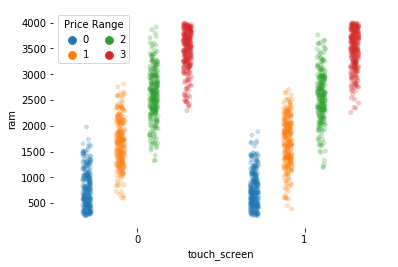

In [13]:
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="touch_screen", y="ram", hue="price_range",
              data=data, dodge=True, jitter=True,
              alpha=.25, zorder=1)

# Show the conditional means

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend( title="Price Range",
          handletextpad=0, columnspacing=1,
          loc="best", ncol=2, frameon=True)

<a id="8"></a> <br>
#### 5- 3G-RAM and Price Range

Following boxplots show 3G or not and ram values according to price range.

0= not 3G, 
1= has 3G

In [14]:
zero=data[data.price_range==0]
one=data[data.price_range==1]
two=data[data.price_range==2]
three=data[data.price_range==3]

trace0 = go.Box(
    y=zero.ram.values,
    x=zero.three_g.values,
    name='0',
    marker=dict(
        color='#3D9970'
    )
)
trace1 = go.Box(
    y=one.ram.values,
    x=one.three_g.values,
    name='1',
    marker=dict(
        color='#FF4136'
    )
)
trace2 = go.Box(
    y=two.ram.values,
    x=two.three_g.values,
    name='2',
    marker=dict(
        color='#FF851B'
    )
)
trace3 = go.Box(
    y=three.ram.values,
    x=three.three_g.values,
    name='3',
    marker=dict(
        color='blue'
    )
)

data1 = [trace0, trace1, trace2,trace3]
layout = go.Layout(
    xaxis=dict(title="Three-g"),
    yaxis=dict(
        title="ram",
        zeroline=False
    ),
    boxmode='group'
)
fig = go.Figure(data=data1, layout=layout)
iplot(fig)

<a id="9"></a> <br>
#### 6- 4G-RAM- PRICE RANGE

Following boxplots show 4G or not and ram values according to price range.

0= not 4G, 
1= has 4G

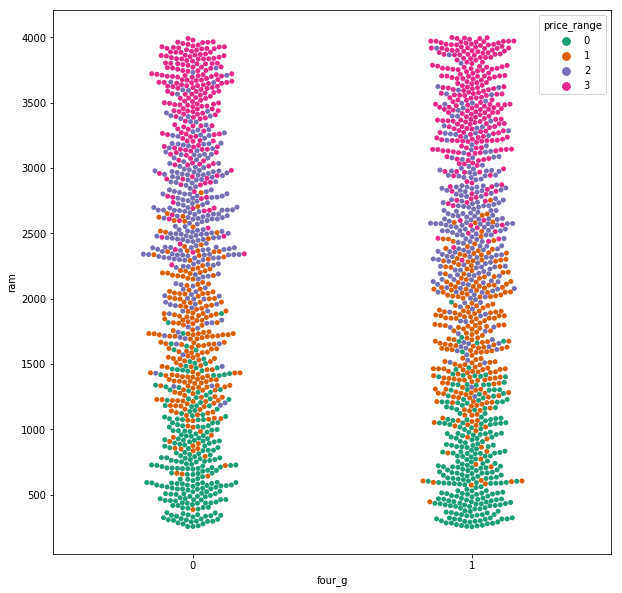

In [15]:
f, ax = plt.subplots(figsize=(10, 10))
ax=sns.swarmplot(x="four_g", y="ram", hue="price_range",
              palette="Dark2", data=data)
ax=sns.set(style="darkgrid")

<a id="10"></a> <br>
#### 7- NUMBER OF CORES OF PROCESOR(n_cores)- RAM and PRICE RANGE

Following line plot shows number of cores of processors and ram values according to price range.

In [16]:
chart=alt.Chart(data).mark_line(
    font="Helvetica Neue").encode(
    x='ram:Q',
    y='n_cores:O',
    color=alt.Color('price_range', scale=alt.Scale(scheme="Viridis")),
    tooltip=["price_range", "ram",'n_cores']
).properties(
    width=400,
    height=300
)
render(chart)

<a id="11"></a> <br>
#### 8- Primary Camera mega pixels(pc) - RAM and Price Range

Following scatter plot shows primary camera mp values and ram values according to price range.

In [17]:
chart=alt.Chart(data).mark_circle(
    opacity=0.8,
    stroke='price_range',
    strokeWidth=1,
    strokeCap='square',
    shape="diamond"
).encode(
    alt.X('ram:O', axis=alt.Axis(labelAngle=0)),
    alt.Y('pc:N'),
    alt.Size('price_range:Q',
        scale=alt.Scale(range=[0, 200])
    ),
    alt.Color('price_range', scale=alt.Scale(scheme="plasma"))
).properties(
    width=400,
    height=300
)
render(chart)

<a id="12"></a> <br>
#### 9- Front Camera mega pixels(fc) - RAM and Price Range

Following bar plot shows front camera mp values and average ram values according to price range.

In [18]:
bars = alt.Chart(data).mark_bar().encode(
    x=alt.X('mean(ram):Q'),
    y=alt.Y('fc:N'),
    color=alt.Color('price_range', scale=alt.Scale(scheme="viridis"))
    
)

text = alt.Chart(data).mark_text(dy=3, dx=-16, color='white').encode(
    x=alt.X('mean(ram):Q', stack='zero'),
    y=alt.Y('fc:N'),
    detail='price_range:N',
    text=alt.Text('mean(ram):Q', format='.0f')
)

render(bars + text)

<a id="13"></a> <br>
#### 10- Weight of mobile phone(mobile_wt)- RAM and Price Range

Following line plots show weight of mobile phone and ram values according to price range

In [19]:
chart=alt.Chart(data).mark_area().encode(
    x='ram:Q',
    y='mobile_wt:Q',
    color=alt.Color('price_range', scale=alt.Scale(scheme="magma")),
    row=alt.Row('price_range:N')
).properties(height=50, width=400)

render(chart)

<a id="14"></a> <br>
#### 11- Mobile Depth in cm (m_dep)- Pixel Resolution Height(px_height)- Pixel Resolution Width(px_width)- Clock Speed(clock_speed) , RAM and Price Range

Following scatter plots show Mobile Depth in cm (m_dep)- Pixel Resolution Height(px_height)- Pixel Resolution Width(px_width)- Clock Speed(clock_speed) and  RAM values according to price range.

In [20]:
chart=alt.Chart(data).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color=alt.Color('price_range', scale=alt.Scale(scheme="plasma"))
).properties(
    width=300,
    height=200
).repeat(
    column=["m_dep",'px_height',  'px_width','clock_speed'],
    row=["ram"]
).interactive()

render(chart)

<a id="15"></a> <br>
#### 12- Longest time that a single battery charge will last when you are(talk_time)- RAM and Price Range

Following line charts similiar with first bar chart. But y line is talk time. 

In [21]:
chart=alt.Chart(data).mark_line(interpolate='step-after').encode(
    x='ram',
    y='talk_time',
    column="price_range",
    color=alt.Color('price_range', scale=alt.Scale(scheme="inferno"))
    
)
render(chart)

<a id="16"></a> <br>
#### 13- WIFI-RAM and PRICE RANGE

Following violin plots shows wifi or not and ram values according to price range.

0- has not wifi, 
1- has wifi

In [22]:
trace0 = go.Violin(
    y=zero.ram.values,
    x=zero.wifi.values,
    name='0',
    marker=dict(
        color='lightgreen'
    )
)
trace1 = go.Violin(
    y=one.ram.values,
    x=one.wifi.values,
    name='1',
    marker=dict(
        color='royalblue'
    )
)
trace2 = go.Violin(
    y=two.ram.values,
    x=two.wifi.values,
    name='2',
    marker=dict(
        color='mediumorchid'
    )
)
trace3 = go.Violin(
    y=three.ram.values,
    x=three.wifi.values,
    name='3',
    marker=dict(
        color='coral'
    )
)

data1 = [trace0, trace1, trace2,trace3]
layout = go.Layout(
    xaxis=dict(title="Wi-Fi"),
    yaxis=dict(
        title="ram",
        zeroline=False
    ),
    boxmode='group'
)
fig = go.Figure(data=data1, layout=layout)
iplot(fig)

<a id="17"></a> <br>
#### 14- DUAL SIM- RAM AND PRICE RANGE

Following distibution plots show dual sim or not and ram values according to price range.

0- has not dual , 
1- has wifi

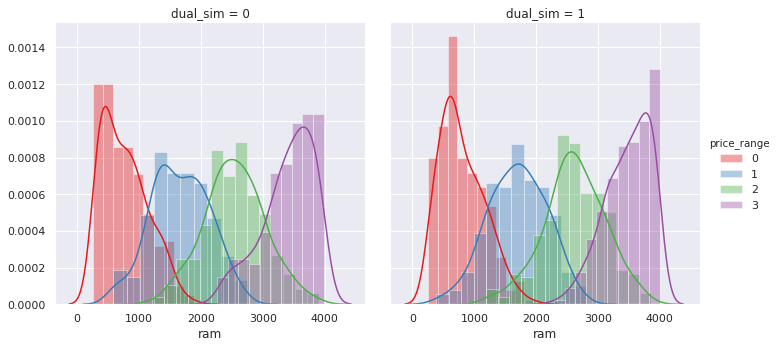

In [23]:
g = sns.FacetGrid(data, col="dual_sim", hue="price_range", palette="Set1",height=5
                   )
g = (g.map(sns.distplot, "ram").add_legend())


<a id="18"></a> <br>
#### 15- Screen Height of mobile(sc_h) AND Screen Width of mobile(sc_w)- RAM and Price Range

In [24]:
color_scale = alt.Scale(domain=['0', '1',"2","3"],
                        range=['rgb(165,0,38)', 'rgb(253,174,97)','rgb(224,243,248)','rgb(49,54,149)'])
base = alt.Chart(data).mark_point().encode(
    x='ram',
     color=alt.Color('price_range', scale=color_scale)
).add_selection(
  
).interactive().properties(
    width=400,
    height=300,
    
)

render(base.encode(y='sc_h') | base.encode(y='sc_w'))

As we saw in the graphs above, the ram feature affects the price range to a great extent. Likewise, battery power, pixel height and weight resolution are the characteristics that affect the price range slightly.

<a id="19"></a> <br>
## 3- SUPPORT MACHINE VECTOR(SVM) ALGORITHM

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

* Effective in high dimensional spaces.
* Still effective in cases where number of dimensions is greater than the number of samples.
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.  

source=(https://scikit-learn.org/stable/modules/svm.html)

for detail

(https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72)

(https://www.ijcai.org/Proceedings/13/Papers/221.pdf)   

(https://www.kaggle.com/kanncaa1/machine-learning-tutorial-for-beginners)
                


#### TRAIN AND TEST SPLIT

In [25]:
y = data["price_range"].values
x_data=data.drop(["price_range"],axis=1)
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

<a id="20"></a> <br>
#### Class Balance Visualization

After applying train- test split let's check how the classes are splitted.

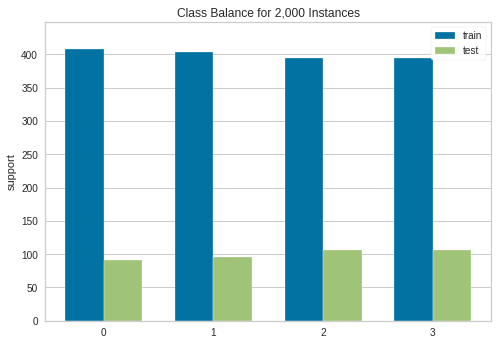

In [26]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=[0, 1, 2,3])
visualizer.fit(y_train, y_test)
visualizer.poof()

All number of classes are about the same. 

<a id="21"></a> <br>
#### FIRST MODEL

In [27]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
print("train accuracy:",svm.score(x_train,y_train))
print("test accuracy:",svm.score(x_test,y_test))

train accuracy: 0.91
test accuracy: 0.84


After applying sklearn library,first model has 0.91 train accuracy and 0.84 test accuracy. 

But how can we increase these scores? Firstly let's reduce unnecessary features to improve estimators’ accuracy scores then apply gridsearch method. 

<a id="22"></a> <br>
#### FEATURE SELECTION

SelectKBest:  removes all but the  highest scoring features

For classification generally these methods are used: chi2, f_classif, mutual_info_classif

**chi2:** Computes chi-squared stats between each non-negative feature and class. This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

**f_classif:** Compute the ANOVA F-value for the provided sample.

**mutual_info_classif:** Estimates mutual information for a discrete target variable. Mutual information (MI)  between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.


source= https://scikit-learn.org/stable/modules/feature_selection.html


I used f_classif method to determine best features

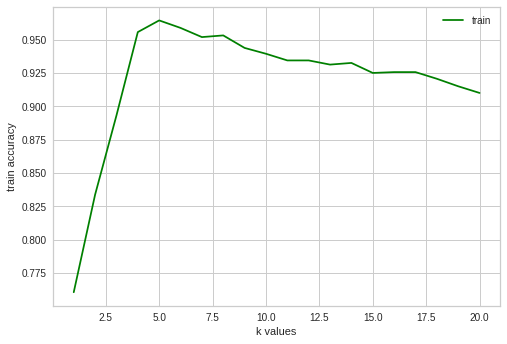

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
accuracy_list_train = []
k=np.arange(1,21,1)
for each in k:
    x_new = SelectKBest(f_classif, k=each).fit_transform(x_train, y_train)
    svm.fit(x_new,y_train)
    accuracy_list_train.append(svm.score(x_new,y_train))   
    
plt.plot(k,accuracy_list_train,color="green",label="train")
plt.xlabel("k values")
plt.ylabel("train accuracy")
plt.legend()
plt.show()



In the graph above, we can see 4 or 5 features gives higher train accuracies. 

In [29]:
d = {'best features number': k, 'train_score': accuracy_list_train}
df = pd.DataFrame(data=d)
print("max accuracy:",df["train_score"].max())
print("max accuracy id:",df["train_score"].idxmax())

max accuracy: 0.964375
max accuracy id: 4


In [30]:
print(" max accuracy values: \n", df.iloc[4])

 max accuracy values: 
 best features number    5.000000
train_score             0.964375
Name: 4, dtype: float64


I used 5 features because it has the highest accuracy. 

Now let's determine our features:

In [31]:
selector = SelectKBest(f_classif, k = 5)
x_new = selector.fit_transform(x_train, y_train)
x_new_test=selector.fit_transform(x_test,y_test)
names_train = x_train.columns.values[selector.get_support()]
names_test = x_test.columns.values[selector.get_support()]
print("x train features:",names_train)
print("x test features:",names_test)

x train features: ['battery_power' 'int_memory' 'px_height' 'px_width' 'ram']
x test features: ['battery_power' 'int_memory' 'px_height' 'px_width' 'ram']


Both train and test data, feature names are battery_power, int_memory,px_height, px_width and ram. 

<a id="23"></a> <br>
#### MODEL WITH GRIDSEARCHCV

To apply svm algorithm firstly I used GridSearchCV method to tune parameters. Some parameters are given below. 

In [32]:
from sklearn.model_selection import GridSearchCV

C=[1,0.1,0.25,0.5,2,0.75]
kernel=["linear","rbf"]
gamma=["auto",0.01,0.001,0.0001,1]
decision_function_shape=["ovo","ovr"]


In [33]:
svm=SVC(random_state=1)
grid_svm=GridSearchCV(estimator=svm,cv=5,param_grid=dict(kernel=kernel,C=C, gamma=gamma, decision_function_shape=decision_function_shape))
grid_svm.fit(x_new,y_train)
print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)

best score:  0.96375
best param:  {'C': 2, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}


After applying GridSearch we have best parameters as C:2, decision_function_shape: "ovo", gamma: "auto" and kernel:"linear".

<a id="24"></a> <br>
#### CV SCORES

**StratifiedKFold:** Provides train/test indices to split data in train/test sets.

This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

Following barchart shows Cross Validation Scores for SVC with 10 fold. And average mean score is 0.957


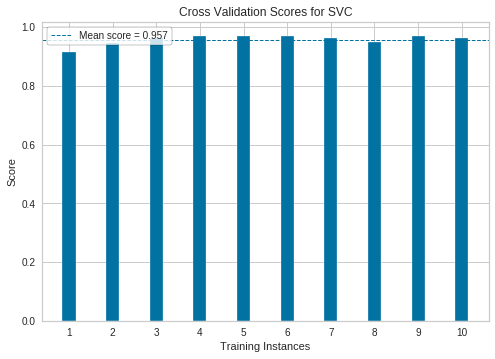

In [34]:

from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores
_, ax = plt.subplots()

# Create a cross-validation strategy
cv = StratifiedKFold(10)

# Create the cv score visualizer
oz = CVScores(
    SVC(C=2,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1), ax=ax, cv=cv, scoring='accuracy'
)
oz.fit(x_new, y_train)
oz.poof()


<a id="25"></a> <br>
#### BUILDING MODEL

No lets build the model with the best parameters we have found with the Gridsearch method.

In [35]:
svm_model=SVC(C=2,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1)


In [36]:
svm_model.fit(x_new,y_train)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
print("train_accuracy:",svm_model.score(x_new,y_train))
print("test_accuracy: ", svm_model.score(x_new_test,y_test))

train_accuracy: 0.964375
test_accuracy:  0.9375


Our model has 0.96 train accuracy and 0.93 test accuracy. Now check that with confusion matrix.

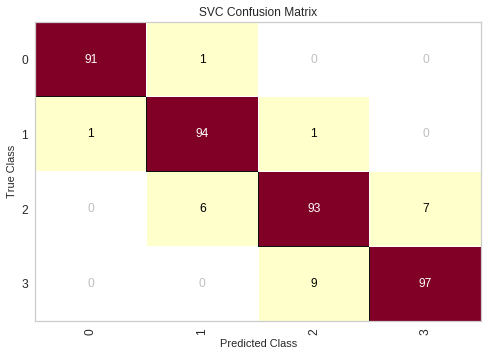

In [38]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(
    svm_model, classes=[0,1,2,3]
)

cm.fit(x_new, y_train)
cm.score(x_new_test, y_test)

cm.poof()

According to confusion matrix model knows yellow boxes wrong. 

<a id="26"></a> <br>
## 4- PREDICTION VISUALIZATION

In [39]:
y_pred=svm_model.predict(x_new_test)

In [40]:
svm_test=x_test[["battery_power","int_memory","px_height","px_width","ram"]]

In [41]:
svm_test["y_true"]=y_test
svm_test["y_pred"]=y_pred

In [42]:
svm_test.head()

battery_power  int_memory  px_height   ...         ram  y_true  y_pred
674        0.356045    0.693548   0.092857   ...    0.190540       0       0
1699       0.334669    0.693548   0.483673   ...    0.261358       0       0
1282       0.072144    0.129032   0.057653   ...    0.440673       1       1
1315       0.674015    0.483871   0.491327   ...    0.159808       1       1
1210       0.203073    0.903226   0.041327   ...    0.839391       2       2

[5 rows x 7 columns]

Following graphs shows ram and battery power features according to true values and predicted values. If you select an area you can see the differences. For example:

Example1:
![](https://i.ibb.co/GcLVcz6/1.png)

Example2
![](https://i.ibb.co/VxKdqH0/2.png)

In [43]:
brush = alt.selection(type='interval')
color_scale = alt.Scale(domain=['0', '1',"2","3"],
                        range=['black', 'green','red','purple'])
points = alt.Chart(title="Y True").mark_point(stroke='price_range',
    strokeWidth=4).encode(
 
    x='ram:Q',
    y='battery_power:Q',
    color=alt.condition(brush, 'y_true:N', alt.value('lightgray'),scale=color_scale)
).properties(
    selection=brush,
    width=800
)
points2=alt.Chart(title="Y Prediction").mark_point(stroke='price_range',
    strokeWidth=4).encode(
    x='ram:Q',
    y='battery_power:Q',
    color=alt.condition(brush, 'y_pred:N', alt.value('lightgray'))
).properties(
    selection=brush,
    width=800
)
# the bottom bar plot
bars = alt.Chart().mark_bar().encode(
    y='y_true:N',
    color='y_true:N',
    x='count(y_true):Q'
).transform_filter(
    brush.ref() # the filter transform uses the selection
                # to filter the input data to this chart
)
bar2 = alt.Chart().mark_bar().encode(
    y='y_pred:N',
    color='y_pred:N',
    x='count(y_pred):Q'
).transform_filter(
    brush.ref() # the filter transform uses the selection
                # to filter the input data to this chart
)
chart = alt.vconcat(points, bars,points2,bar2, data=svm_test)
render(chart)

##### Thank you for your interest. I would be happy to hear your comments to improve my self-development!!